In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
df=pd.read_csv(r"C:\Users\kulde\Downloads\Grocery-Store-Sales-Time-Series-Dataset.csv",parse_dates=True,index_col="Date")
df

,sales
Date,
2021-01-01,63473.0
2021-01-02,57967.0
2021-01-03,63609.0
2021-01-04,62593.0
2021-01-05,66993.0
2021-01-06,65591.0
2021-01-07,67853.0
2021-01-08,67414.0
2021-01-09,65925.0


In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(51, 1)

In [5]:
df.head( )

,sales
Date,
2021-01-01,63473.0
2021-01-02,57967.0
2021-01-03,63609.0
2021-01-04,62593.0
2021-01-05,66993.0


In [6]:
df.tail()

,sales
Date,
2024-01-11,76232.0
2024-01-12,78601.0
2025-01-01,76065.0
2025-01-02,69314.0
2025-01-03,75275.0


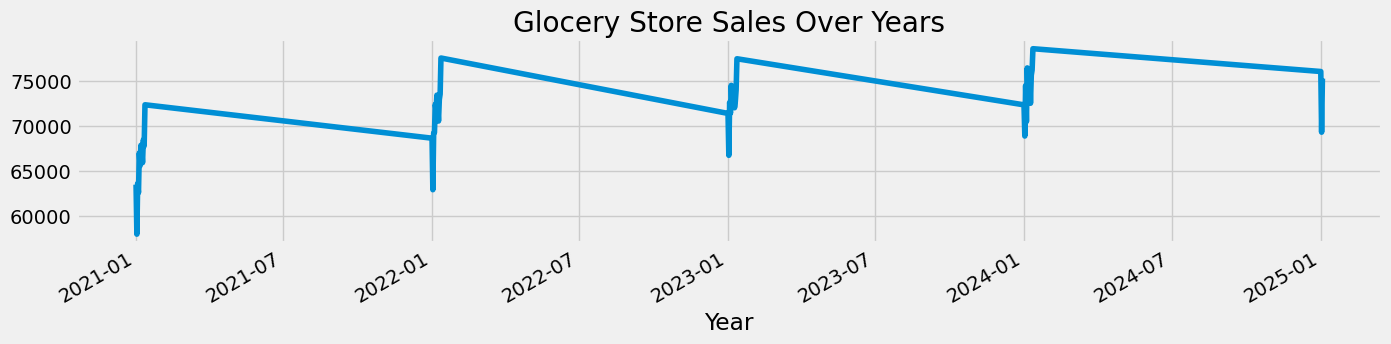

In [7]:
plt.figure(figsize=(15,3))
df["sales"].plot()
plt.title("Glocery Store Sales Over Years")
plt.xlabel("Year")
plt.show()

In [8]:
df1=df.diff()
df1.dropna(inplace=True)

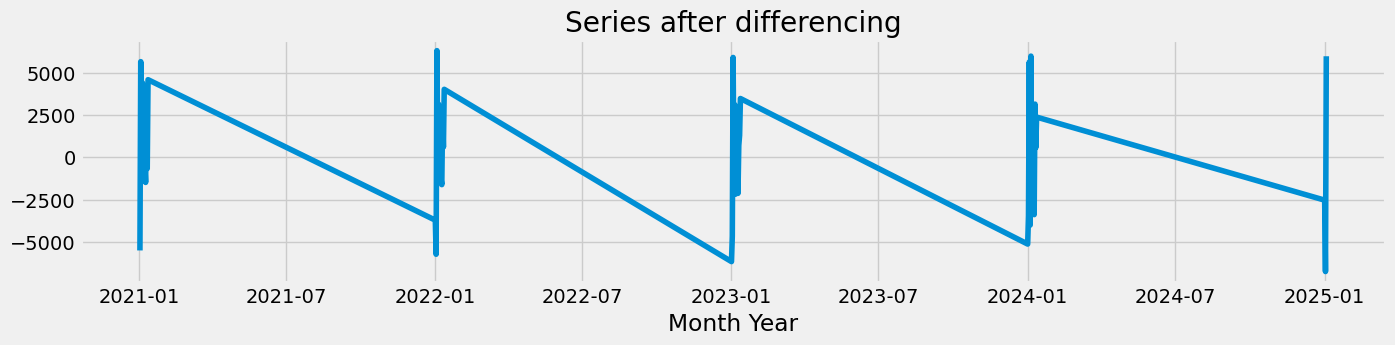

In [9]:
plt.figure(figsize=(15,3))
plt.plot(df1["sales"])
plt.title("Series after differencing")
plt.xlabel("Month Year")
plt.show()

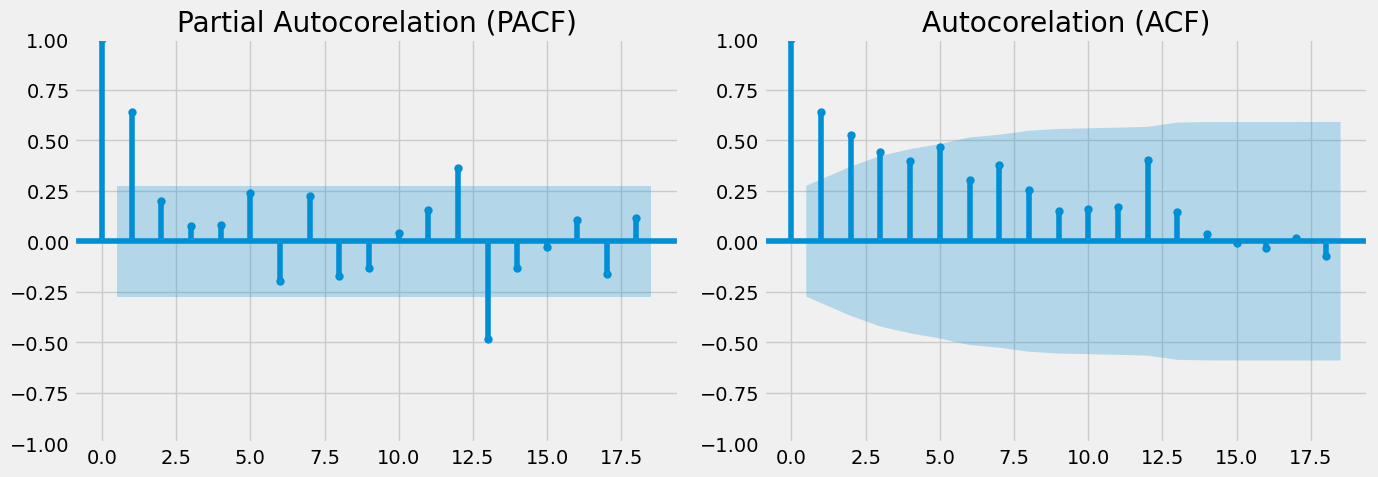

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,ax=plt.subplots(1,2,figsize=(14,5))

plot_pacf(df["sales"],ax=ax[0])
ax[0].set_title("Partial Autocorelation (PACF)")

plot_acf(df["sales"],ax=ax[1])
ax[1].set_title("Autocorelation (ACF)")

plt.tight_layout()
plt.show()

In [11]:
train_df=df[ :-12]
test_df=df[-12: ]

In [12]:
from statsmodels.tsa.arima.model import ARIMA

model_arima=ARIMA(train_df,order=(1,1,1))

model_fit=model_arima.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -363.280
Date:                Sat, 08 Nov 2025   AIC                            732.559
Time:                        15:07:25   BIC                            737.472
Sample:                             0   HQIC                           734.307
                                 - 39                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.172      5.799      0.000       0.662       1.338
ma.L1         -0.9999      0.471     -2.124      0.034      -1.922      -0.077
sigma2      1.157e+07   7.28e-08   1.59e+14      0.0

In [14]:
n_forecast=12
predict=model_fit.predict(start=len(train_df),end=len(train_df)+n_forecast-1)
# predict.rename("predicted",inplace=True)
predict

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


39    74517.725338
40    74529.450527
41    74541.175567
42    74552.900458
43    74564.625199
44    74576.349792
45    74588.074235
46    74599.798530
47    74611.522675
48    74623.246672
49    74634.970519
50    74646.694217
Name: predicted_mean, dtype: float64

In [15]:
pred_df=pd.DataFrame(predict)
pred_df.columns=["predicted_sales"]
pred_df["predicted_sales"]=round(pred_df["predicted_sales"],0)
pred_df

,predicted_sales
39,74518.0
40,74529.0
41,74541.0
42,74553.0
43,74565.0
44,74576.0
45,74588.0
46,74600.0
47,74612.0
48,74623.0


In [16]:
actual_vs_pred=pd.concat([test_df,pred_df],axis=1)
actual_vs_pred["error"]=actual_vs_pred["sales"]-actual_vs_pred["predicted_sales"]
actual_vs_pred.rename(columns={"sales":"actual_sales"},inplace=True)
actual_vs_pred

,actual_sales,predicted_sales,error
2024-01-04 00:00:00,70496.0,NaN,NaN
2024-01-05 00:00:00,76465.0,NaN,NaN
2024-01-06 00:00:00,73686.0,NaN,NaN
2024-01-07 00:00:00,75931.0,NaN,NaN
2024-01-08 00:00:00,75923.0,NaN,NaN
2024-01-09 00:00:00,72532.0,NaN,NaN
2024-01-10 00:00:00,75667.0,NaN,NaN
2024-01-11 00:00:00,76232.0,NaN,NaN
2024-01-12 00:00:00,78601.0,NaN,NaN
2025-01-01 00:00:00,76065.0,NaN,NaN


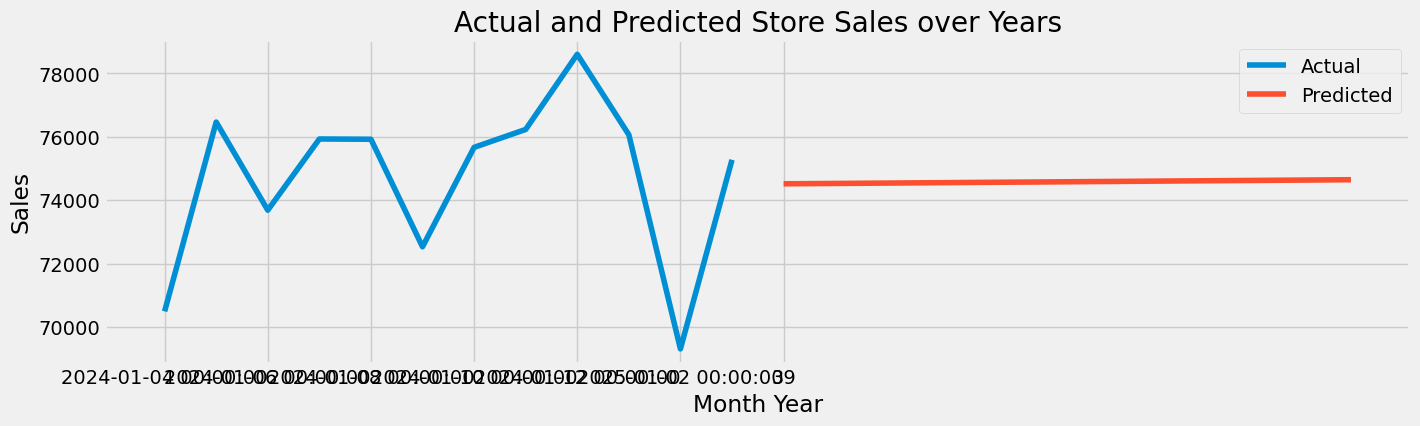

In [17]:
plt.figure(figsize=(15,4))
actual_vs_pred["actual_sales"].plot()
actual_vs_pred["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales over Years")
plt.xlabel("Month Year")
plt.ylabel("Sales")
plt.legend(["Actual","Predicted"])
plt.show()

In [20]:
# !pip install numpy==1.26.4
# !pip install pmdarima --no-cache-dir

In [22]:
from pmdarima import auto_arima
auto_arima_result=auto_arima(train_df,seasonal=True,m=12)

In [24]:
print(auto_arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   39
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -212.937
Date:                              Sat, 08 Nov 2025   AIC                            431.875
Time:                                      15:11:40   BIC                            435.649
Sample:                                           0   HQIC                           432.962
                                               - 39                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5061      2.246     -0.225      0.822      -4.909       3.896
ma.S.L12       0.58

In [25]:
auto_arima_result.order,auto_arima_result.seasonal_order

((0, 1, 0), (1, 1, 1, 12))

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
model_sarimax=SARIMAX(train_df,order=auto_arima_result.order,seasonal_order=auto_arima_result.seasonal_order)
model_fit=model_sarimax.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [30]:
n_forecast=12
pred_values=model_fit.predict(start=len(train_df),end=len(train_df)+n_forecast-1)
pred_values=pred_values.rename("predicted",inplace=True)
pred_df=pd.DataFrame(pred_values)
pred_df["predicted"]=round(pred_df["predicted"],0)
pred_df

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted
39,73143.0
40,76347.0
41,73994.0
42,75861.0
43,76011.0
44,73825.0
45,74415.0
46,75698.0
47,79199.0
48,73506.0


In [31]:
actual_vs_pred_df=pd.concat([test_df,pred_df],axis=1)
actual_vs_pred_df["error"]=actual_vs_pred_df["sales"]-actual_vs_pred_df["predicted"]
actual_vs_pred_df.rename(columns={"sales":"actual_sales"},inplace=True)
actual_vs_pred_df.rename(columns={"predicted":"predicted_sales"},inplace=True)
actual_vs_pred_df

,actual_sales,predicted_sales,error
2024-01-04 00:00:00,70496.0,NaN,NaN
2024-01-05 00:00:00,76465.0,NaN,NaN
2024-01-06 00:00:00,73686.0,NaN,NaN
2024-01-07 00:00:00,75931.0,NaN,NaN
2024-01-08 00:00:00,75923.0,NaN,NaN
2024-01-09 00:00:00,72532.0,NaN,NaN
2024-01-10 00:00:00,75667.0,NaN,NaN
2024-01-11 00:00:00,76232.0,NaN,NaN
2024-01-12 00:00:00,78601.0,NaN,NaN
2025-01-01 00:00:00,76065.0,NaN,NaN


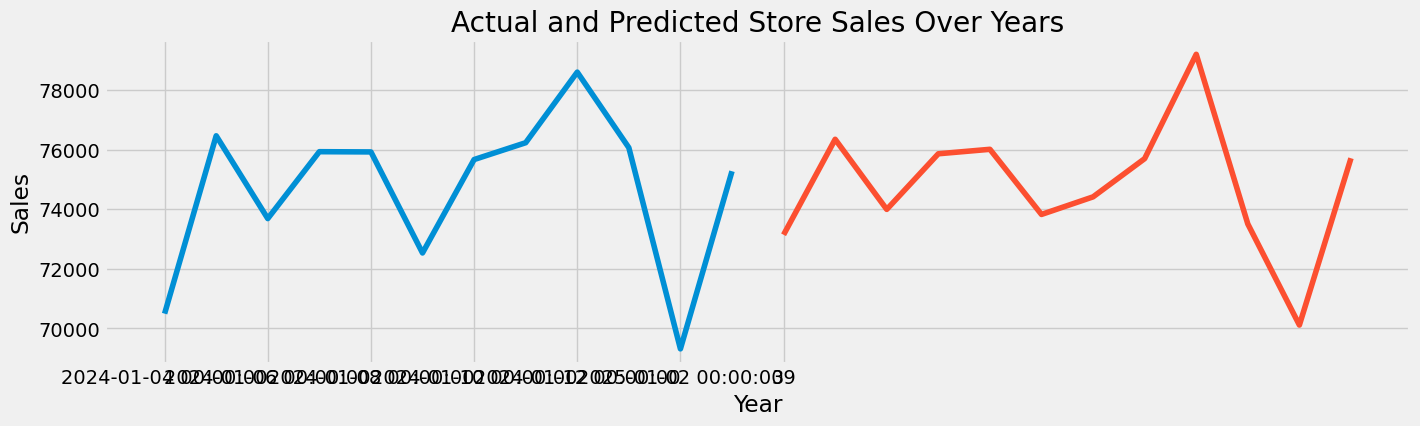

In [32]:
plt.figure(figsize=(15,4))
actual_vs_pred_df["actual_sales"].plot()
actual_vs_pred_df["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

In [33]:
auto_arima_result=auto_arima(df,seasonal=True,m=12)

In [34]:
print(auto_arima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   51
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -325.575
Date:                            Sat, 08 Nov 2025   AIC                            657.151
Time:                                    15:33:06   BIC                            662.064
Sample:                                         0   HQIC                           658.899
                                             - 51                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0399      0.134      0.297      0.767      -0.223       0.303
ar.S.L24      -0.0585      0.058   